# Scenario Generation

Notebook for generating the scenarios for the team assignment.
<br>Datasets from: Pinson, P. (2013). Wind Energy: Forecasting Challenges for Its Operational Management. Statistical Science, 28(4). https://doi.org/10.1214/13-STS445


In [35]:
using CSV
using DataFrames
using Plots
using Statistics
using Distributions
using Random
using Clustering
using KernelDensity
using PrettyTables

In [36]:
using StatsModels, TimeSeries, StatsBase

In [37]:
gr()

Plots.GRBackend()

## Dataset Inspection

In [38]:
df_zone1 = CSV.read("data/scen_zone1.out", DataFrame)

┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586


44×101 DataFrame
 Row │ Column1  V1               V2              V3               V4           ⋯
     │ String3  Float64?         Float64?        Float64?         Float64?     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1              0.38446          0.5077          0.464001         0.4768 ⋯
   2 │ 2              0.334138         0.454995        0.545837         0.5396
   3 │ 3              0.39211          0.584795        0.714401         0.6739
   4 │ 4              0.320718         0.671243        0.797851         0.6683
   5 │ 5              0.511098         0.727537        0.804719         0.8265 ⋯
   6 │ 6              0.670195         0.655562        0.785114         0.8091
   7 │ 7              0.732583         0.768349        0.70783          0.7996
   8 │ 8              0.715879         0.816962        0.77647          0.8540
   9 │ 9              0.816484         0.722401        0.863191         0.9265 ⋯
  10 │ 10             0.863173         0.520111        0.833182         0.8900
  11 │ 11             0.834677         0.444936        0.774479         0.9362
  ⋮  │    ⋮            ⋮               ⋮                ⋮                ⋮     ⋱
  35 │ 35             0.253387         0.271667        0.317439         0.2068
  36 │ 36             0.105008         0.185463        0.215776         0.1909 ⋯
  37 │ 37             0.140265         0.145943        0.191948         0.1203
  38 │ 38             0.218467         0.165741        0.199312         0.1717
  39 │ 39             0.215151         0.186776        0.0822716        0.3001
  40 │ 40             0.23687          0.184147        0.0885939        0.2421 ⋯
  41 │ 41             0.139296         0.215371        0.121644         0.1511
  42 │ 42             0.116903         0.106516        0.162074         0.0877
  43 │ 43             0.0953018        0.132558        0.0916319        0.0510
  44 │ END      missing          missing         missing          missing      ⋯
                                                  97 columns and 23 rows omitted

In [5]:
df_zone1 = dropmissing(df_zone1, disallowmissing=true)
# Drops the first column!
select!(df_zone1, Not(1))
pretty_table(df_zone1)

┌───────────┬──────────┬───────────┬───────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬────────────┬───────────┬──────────┬──────────┬───────────┬───────────┬────────────┬───────────┬────────────┬────────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬───────────┬────────────┬──────────┬───────────┬────────────┬───────────┬────────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬────────────┬──────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬─────

In [6]:
describe(df_zone1)

100×7 DataFrame
 Row │ variable  mean      min         median    max       nmissing  eltype   
     │ Symbol    Float64   Float64     Float64   Float64   Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────
   1 │ V1        0.507327  0.0953018   0.539354  0.863173         0  Float64
   2 │ V2        0.456242  0.106516    0.49812   0.818464         0  Float64
   3 │ V3        0.533315  0.0822716   0.630709  0.863191         0  Float64
   4 │ V4        0.50238   0.0109027   0.643279  0.936282         0  Float64
   5 │ V5        0.470435  0.0         0.666735  0.818448         0  Float64
   6 │ V6        0.381401  0.0         0.354537  0.832788         0  Float64
   7 │ V7        0.443027  0.0676631   0.468877  0.85211          0  Float64
   8 │ V8        0.505733  0.0502404   0.681173  0.839562         0  Float64
   9 │ V9        0.529046  0.0551056   0.600574  0.867576         0  Float64
  10 │ V10       0.554556  0.0716024   0.556367  0.816731         0  Float64
  11 │ V11       0.581009  0.068279    0.743107  0.981795         0  Float64
  ⋮  │    ⋮         ⋮          ⋮          ⋮         ⋮         ⋮         ⋮
  91 │ V91       0.411357  0.0506172   0.319449  0.848011         0  Float64
  92 │ V92       0.425436  0.0725901   0.413748  0.986557         0  Float64
  93 │ V93       0.545593  0.0600499   0.641146  0.938806         0  Float64
  94 │ V94       0.515826  0.0576786   0.592232  0.833816         0  Float64
  95 │ V95       0.557865  0.0         0.681269  0.985896         0  Float64
  96 │ V96       0.328987  0.00270037  0.21545   0.767164         0  Float64
  97 │ V97       0.547774  0.110801    0.593345  0.851348         0  Float64
  98 │ V98       0.496096  0.0816591   0.505075  0.775203         0  Float64
  99 │ V99       0.586983  0.143854    0.614389  0.864252         0  Float64
 100 │ V100      0.50442   0.0346856   0.566492  0.954676         0  Float64
                                                               79 rows omitted

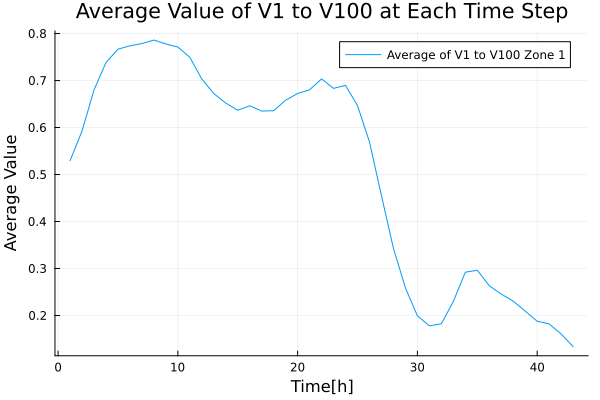

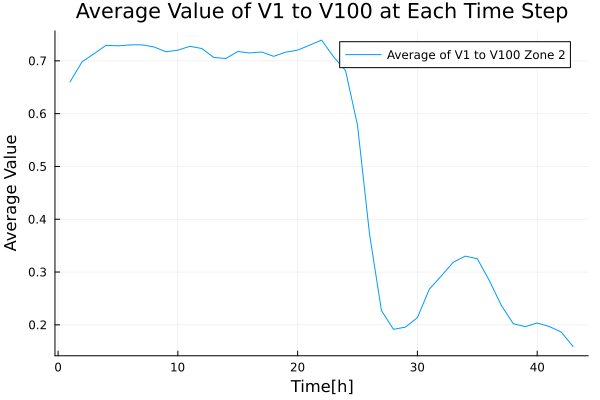

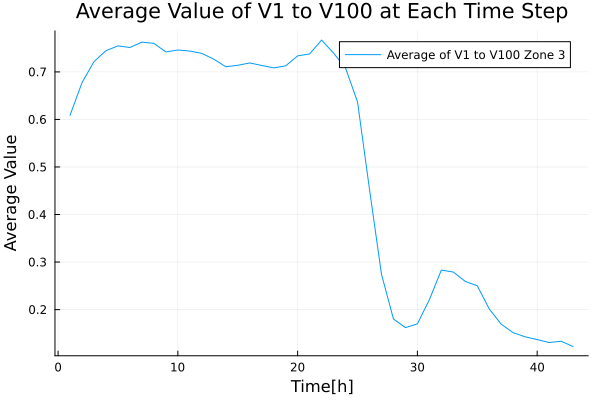

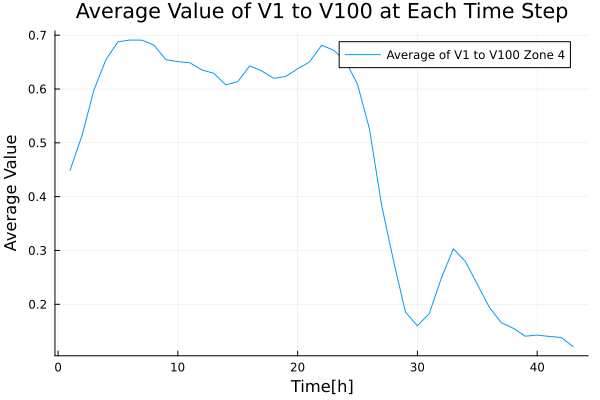

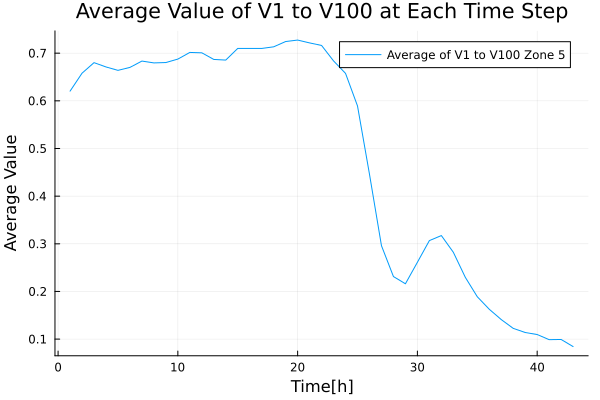

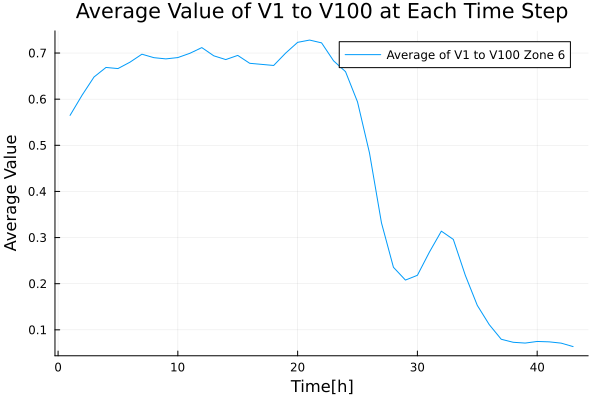

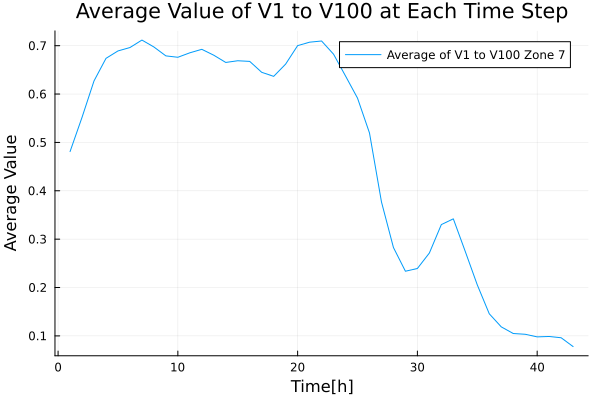

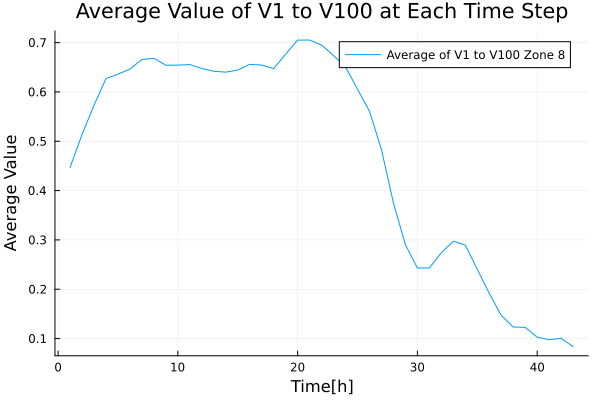

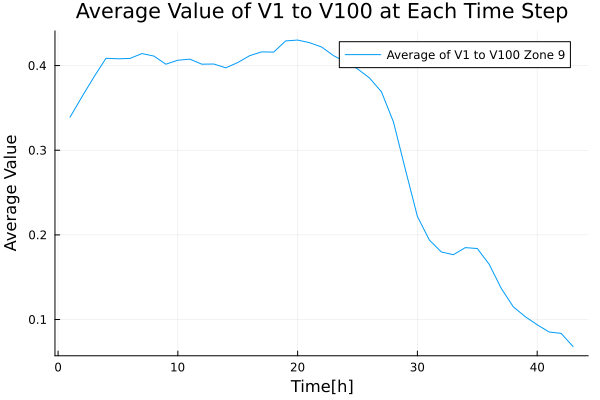

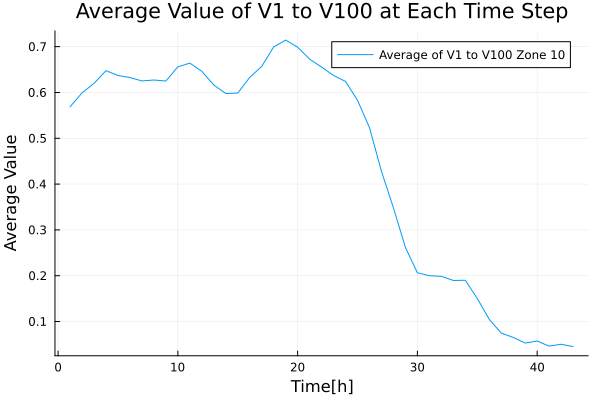

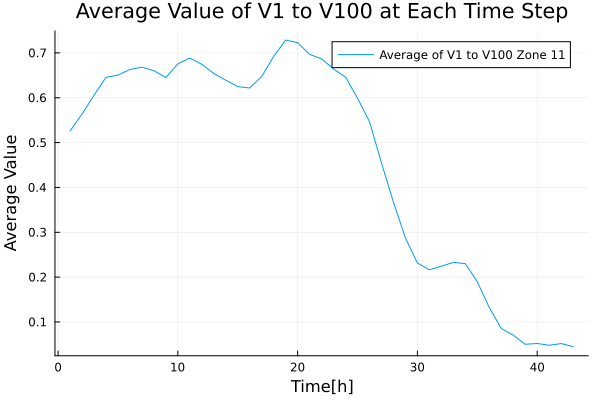

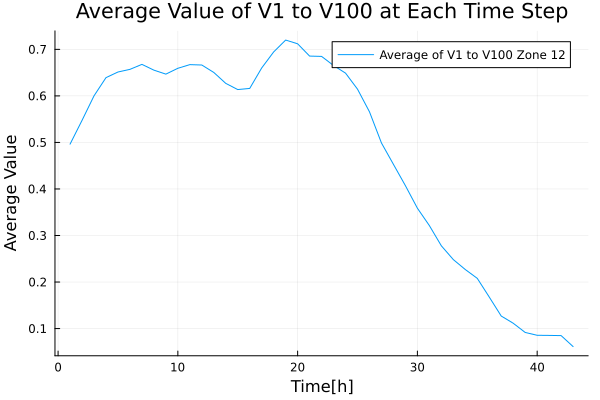

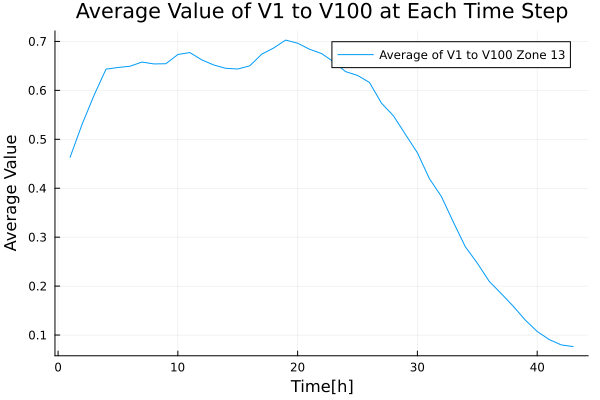

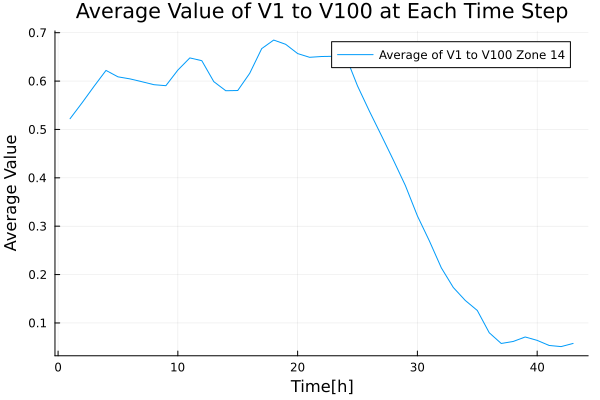

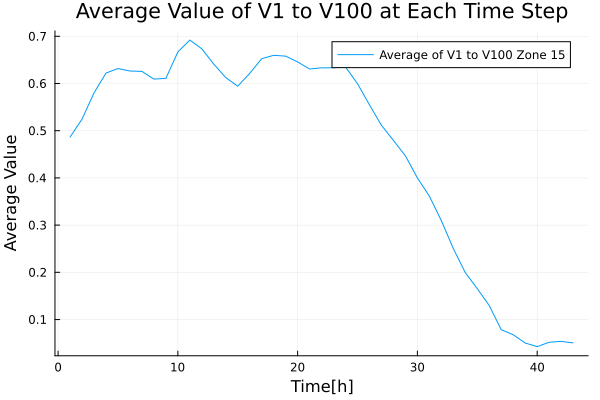

In [7]:
# Define the number of zones 
num_zones = 15

df_zones = DataFrame()

# Suppresses warnings about missing values
function suppress_csv_warnings(zone)
    file_path = "data/scen_zone$zone.out"
    return DataFrame(CSV.File(file_path, silencewarnings=true))
    
end

# Iterate over zones
for zone in 1:num_zones
    
    # Read dataframe
    df = suppress_csv_warnings(zone)

    # Clean dataframe
    df = dropmissing(df, disallowmissing=true)
    select!(df, Not(1))

    # Calculate and plot mean values
    row_means = [mean(skipmissing(row)) for row in eachrow(df)]
    df_means = DataFrame(RowMean = row_means)
    p = plot(df_means.RowMean, label="Average of V1 to V100 Zone $zone", xlabel="Time[h]", ylabel="Average Value", title="Average Value of V1 to V100 at Each Time Step")
    display(p) 

    # Rename column
    DataFrames.rename!(df_means, "RowMean" => "Avg_Zone_$zone")
       
    # Concatenate dataframes
    if ncol(df_zones) == 0
        df_zones = df_means
    else
        df_zones = hcat(df_zones, df_means, makeunique=true)
    end
end


<p><img src="images/western_denmark.png" alt="Map of Denmark depicting the 15 zones" width="400"/>
<img src="images/wind_power_measurements.jpg" alt="Plots showing the wind power measurements in the 15 zones" width="600"/></p>


For some reason, some deviations (e.g. plot of zone 1 code vs. image)

## Inter-zonal Relationships

In [8]:
df_zones

43×15 DataFrame
 Row │ Avg_Zone_1  Avg_Zone_2  Avg_Zone_3  Avg_Zone_4  Avg_Zone_5  Avg_Zone_6  ⋯
     │ Float64     Float64     Float64     Float64     Float64     Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   0.529259    0.660183    0.608828    0.448859   0.620302    0.56485    ⋯
   2 │   0.592708    0.698176    0.67751     0.513925   0.65799     0.608469
   3 │   0.680013    0.713454    0.72169     0.598506   0.680121    0.648035
   4 │   0.738374    0.729425    0.744719    0.654851   0.671094    0.668735
   5 │   0.766749    0.728429    0.754726    0.687775   0.663946    0.666317   ⋯
   6 │   0.773928    0.730288    0.751358    0.690962   0.670179    0.68012
   7 │   0.778704    0.730417    0.762698    0.690789   0.683436    0.69745
   8 │   0.786118    0.726389    0.759992    0.681714   0.67959     0.689923
   9 │   0.777854    0.717297    0.742022    0.654506   0.680343    0.687299   ⋯
  10 │   0.771308    0.720192    0.746077    0.650922   0.687605    0.690165
  11 │   0.749316    0.727594    0.743881    0.648865   0.701555    0.699372
  ⋮  │     ⋮           ⋮           ⋮           ⋮           ⋮           ⋮       ⋱
  34 │   0.29206     0.330153    0.259171    0.279739   0.229676    0.218246
  35 │   0.296341    0.325307    0.250096    0.23729    0.188931    0.153071   ⋯
  36 │   0.263336    0.284201    0.201341    0.194588   0.162669    0.111261
  37 │   0.245595    0.237196    0.169278    0.165844   0.141009    0.0796001
  38 │   0.230392    0.202193    0.151273    0.155512   0.122565    0.0730412
  39 │   0.20931     0.196612    0.142732    0.140727   0.113856    0.0713468  ⋯
  40 │   0.187828    0.203471    0.136908    0.142741   0.109598    0.074824
  41 │   0.182153    0.196952    0.130772    0.14027    0.098874    0.0739961
  42 │   0.160706    0.186598    0.133473    0.138389   0.0992646   0.071211
  43 │   0.133813    0.158813    0.122173    0.121364   0.0842963   0.0636902  ⋯
                                                   9 columns and 22 rows omitted

In [9]:
describe(df_zones)


15×7 DataFrame
 Row │ variable     mean      min        median    max       nmissing  eltype  ⋯
     │ Symbol       Float64   Float64    Float64   Float64   Int64     DataTyp ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Avg_Zone_1   0.508744  0.133813   0.635779  0.786118         0  Float64 ⋯
   2 │ Avg_Zone_2   0.515082  0.158813   0.698176  0.739397         0  Float64
   3 │ Avg_Zone_3   0.507002  0.122173   0.707932  0.766981         0  Float64
   4 │ Avg_Zone_4   0.460916  0.121364   0.607641  0.690962         0  Float64
   5 │ Avg_Zone_5   0.484658  0.0842963  0.65799   0.727509         0  Float64 ⋯
   6 │ Avg_Zone_6   0.471366  0.0636902  0.648035  0.728093         0  Float64
   7 │ Avg_Zone_7   0.475206  0.0778152  0.627172  0.711647         0  Float64
   8 │ Avg_Zone_8   0.470944  0.0837281  0.6055    0.705145         0  Float64
   9 │ Avg_Zone_9   0.313512  0.0680126  0.396128  0.430154         0  Float64 ⋯
  10 │ Avg_Zone_10  0.44484   0.0452001  0.598641  0.714402         0  Float64
  11 │ Avg_Zone_11  0.460604  0.0450717  0.605572  0.728625         0  Float64
  12 │ Avg_Zone_12  0.477343  0.0613024  0.613573  0.719921         0  Float64
  13 │ Avg_Zone_13  0.50135   0.0764243  0.630503  0.702752         0  Float64 ⋯
  14 │ Avg_Zone_14  0.442819  0.0510772  0.580504  0.684802         0  Float64
  15 │ Avg_Zone_15  0.459764  0.0426699  0.594286  0.692038         0  Float64
                                                                1 column omitted

In [10]:
# Correlation
cor_matrix = cor(Matrix(df_zones))
df_cor = DataFrame(cor_matrix, :auto)


15×15 DataFrame
 Row │ x1        x2        x3        x4        x5        x6        x7        x ⋯
     │ Float64   Float64   Float64   Float64   Float64   Float64   Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.0       0.948881  0.970948  0.98485   0.948454  0.957351  0.964872  0 ⋯
   2 │ 0.948881  1.0       0.993085  0.960897  0.980553  0.97047   0.959608  0
   3 │ 0.970948  0.993085  1.0       0.983926  0.98867   0.986625  0.981173  0
   4 │ 0.98485   0.960897  0.983926  1.0       0.970995  0.981427  0.988827  0
   5 │ 0.948454  0.980553  0.98867   0.970995  1.0       0.995969  0.985681  0 ⋯
   6 │ 0.957351  0.97047   0.986625  0.981427  0.995969  1.0       0.995625  0
   7 │ 0.964872  0.959608  0.981173  0.988827  0.985681  0.995625  1.0       0
   8 │ 0.963525  0.930494  0.959123  0.98389   0.968407  0.981654  0.989014  1
   9 │ 0.939861  0.882464  0.915834  0.947238  0.938673  0.95099   0.956886  0 ⋯
  10 │ 0.960988  0.941734  0.964396  0.972998  0.979401  0.984049  0.979793  0
  11 │ 0.963401  0.936545  0.96199   0.977484  0.975669  0.984973  0.986043  0
  12 │ 0.939081  0.900059  0.931142  0.953247  0.956812  0.967947  0.971065  0
  13 │ 0.88878   0.83645   0.874616  0.908467  0.915087  0.930819  0.939792  0 ⋯
  14 │ 0.928582  0.891398  0.923088  0.94226   0.952335  0.960802  0.958065  0
  15 │ 0.907714  0.864963  0.900004  0.92443   0.935909  0.949196  0.952515  0
                                                               8 columns omitted

In [11]:
# Covariance
cov_matrix = cov(Matrix(df_zones), corrected=false)
df_cov = DataFrame(cov_matrix, :auto)


15×15 DataFrame
 Row │ x1         x2         x3         x4         x5         x6         x7    ⋯
     │ Float64    Float64    Float64    Float64    Float64    Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.0528533  0.0510732  0.0583884  0.0491585  0.0535794  0.0562292  0.052 ⋯
   2 │ 0.0510732  0.0548138  0.0608171  0.0488444  0.0564107  0.0580473  0.052
   3 │ 0.0583884  0.0608171  0.0684209  0.0558791  0.0635465  0.0659327  0.060
   4 │ 0.0491585  0.0488444  0.0558791  0.0471395  0.051803   0.0544384  0.050
   5 │ 0.0535794  0.0564107  0.0635465  0.051803   0.0603797  0.0625239  0.056 ⋯
   6 │ 0.0562292  0.0580473  0.0659327  0.0544384  0.0625239  0.0652693  0.059
   7 │ 0.0521782  0.0528473  0.0603704  0.0505006  0.0569725  0.0598321  0.055
   8 │ 0.048728   0.0479224  0.0551885  0.0469914  0.0523459  0.0551687  0.051
   9 │ 0.0269923  0.0258097  0.0299263  0.0256917  0.0288138  0.0303509  0.028 ⋯
  10 │ 0.0540781  0.0539686  0.0617473  0.0517097  0.058908   0.0615374  0.056
  11 │ 0.054459   0.0539138  0.0618716  0.0521829  0.0589487  0.0618736  0.057
  12 │ 0.0486123  0.0474486  0.0548426  0.0466021  0.0529395  0.0556819  0.051
  13 │ 0.0428276  0.0410467  0.0479519  0.0413424  0.0471305  0.0498441  0.046 ⋯
  14 │ 0.0497848  0.0486695  0.056309   0.0477094  0.0545727  0.0572439  0.052
  15 │ 0.0472507  0.0458528  0.0533043  0.0454453  0.0520718  0.0549077  0.050
                                                               9 columns omitted

In [12]:
# Calculate the average correlation for each zone, excluding the diagonal (self-correlation)
row_sums = sum(cor_matrix, dims=2) .- 1  # Subtract 1 for self-correlation
num_zones = size(cor_matrix, 2) - 1  # Subtract 1 to exclude self-correlation from count
average_correlations = row_sums / num_zones

# Convert to 1D array for easier handling
average_correlations = dropdims(average_correlations, dims=2)

# Print the average correlation values
for (index, avg_corr) in enumerate(average_correlations)
    println("Zone $index: $avg_corr")
end

# Find the zone with the highest average correlation
max_corr_value, max_corr_index = findmax(average_correlations)
println("Zone with the highest average correlation is Zone $max_corr_index with an average of $max_corr_value")


Zone 1: 0.9476633642129558
Zone 2: 0.9284001335885591
Zone 3: 0.9524728378712517
Zone 4: 0.9629240320606216
Zone 5: 0.963758296259244
Zone 6: 0.9712784054146891
Zone 7: 0.9720686209907867
Zone 8: 0.9734535590968286
Zone 9: 0.9590844677149301
Zone 10: 0.9746989616644646
Zone 11: 0.9772049474195131
Zone 12: 0.9678341826826761
Zone 13: 0.9365418918788004
Zone 14: 0.9610394835225755
Zone 15: 0.9504397537152652
Zone with the highest average correlation is Zone 11 with an average of 0.9772049474195131


<img src="images/western_denmark_real_map.jpg" alt="Google Maps and Zone Map overlay" width="400"/>

We thus use historic wind data measurements from Billund, Denmark because it it located in zone 11 that has the highest average wind power measurement correlation to all other zones.

## Wind Speed Data

The datasets were obtained from https://open-meteo.com/en/docs/historical-weather-api <br>
Time Zone: Europe/Berlin,CET <br>
Time Frame: 2023-07-03 T00:00:00	to 2024-01-31 T00:00:00

In [88]:
# Define the column names
column_names = [:Zone, :Location, :Coordinates, :Elevation_Meters]

# Define the data to insert into the table
# Each inner array represents the data for one column
data = [
    1:15, # Data for Col1
    ["Brønderslev", "Hanstholm", "Skive" , "Hobro", "Hvide Sande",  "Herning", "Silkeborg", "Aarhus", "Samsø", "Esbjerg", "Billund", "Middelfart", "Nyborg", "Rømø", "Aabenraa"], # Data for Col2
    ["57.258347; 9.957447", "57.11775; 8.580508", "56.625656; 9.018789", "56.625656; 9.770355", "55.99297; 8.114755", "56.133568; 8.888888", "56.133568; 9.629629", "56.133568; 10.1851845", "55.85237; 10.653061", "55.43058; 8.709678",  "55.711773; 9.146341", "55.500877; 9.818182", "55.28998; 10.662651", "55.149384; 8.46", "55.079086; 9.520959"], # Data for Col3
    [26, 59, 12, 36, 3, 59, 86, 17, 13, 22, 67, 18, 5, 3, 48] # Data for Col4
]

# Create the DataFrame
locations = DataFrame(data, column_names)

15×4 DataFrame
 Row │ Zone   Location     Coordinates            Elevation_Meters 
     │ Int64  String       String                 Int64            
─────┼─────────────────────────────────────────────────────────────
   1 │     1  Brønderslev  57.258347; 9.957447                  26
   2 │     2  Hanstholm    57.11775; 8.580508                   59
   3 │     3  Skive        56.625656; 9.018789                  12
   4 │     4  Hobro        56.625656; 9.770355                  36
   5 │     5  Hvide Sande  55.99297; 8.114755                    3
   6 │     6  Herning      56.133568; 8.888888                  59
   7 │     7  Silkeborg    56.133568; 9.629629                  86
   8 │     8  Aarhus       56.133568; 10.1851845                17
   9 │     9  Samsø        55.85237; 10.653061                  13
  10 │    10  Esbjerg      55.43058; 8.709678                   22
  11 │    11  Billund      55.711773; 9.146341                  67
  12 │    12  Middelfart   55.500877; 9.818182                  18
  13 │    13  Nyborg       55.28998; 10.662651                   5
  14 │    14  Rømø         55.149384; 8.46                       3
  15 │    15  Aabenraa     55.079086; 9.520959                  48

In [89]:
# Initialize an empty dictionary to hold the DataFrames
zones = Dict()

for zone in 1:15
    println(zone) # This will print 1, then 6, and then 11 in separate iterations.
    
    # Read the CSV file into a DataFrame
    df = CSV.read("data/wind_speed_zone_$(zone).csv", DataFrame)
    
    # Rename columns
    DataFrames.rename!(df, :time => :date_time, Symbol("wind_speed_100m (km/h)") => :wind_speed_100m)
    
    # Remove rows with NaN values in the specified column
    df = df[.!ismissing.(df[:, :wind_speed_100m]), :]
    
    # Alternatively, drop all missing values (if needed, but it's redundant after the above step)
    # df = dropmissing(df)
    
    # Store the DataFrame in the dictionary with a key like "data_zone_1"
    zones["data_zone_$zone"] = df
end


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [87]:
zones["data_zone_15"]

5112×2 DataFrame
  Row │ date_time            wind_speed_100m 
      │ DateTime             Float64         
──────┼──────────────────────────────────────
    1 │ 2023-07-03T00:00:00             43.8
    2 │ 2023-07-03T01:00:00             41.7
    3 │ 2023-07-03T02:00:00             40.6
    4 │ 2023-07-03T03:00:00             40.8
    5 │ 2023-07-03T04:00:00             39.2
    6 │ 2023-07-03T05:00:00             38.6
    7 │ 2023-07-03T06:00:00             40.6
    8 │ 2023-07-03T07:00:00             46.0
    9 │ 2023-07-03T08:00:00             46.5
   10 │ 2023-07-03T09:00:00             47.5
   11 │ 2023-07-03T10:00:00             48.2
  ⋮   │          ⋮                  ⋮
 5103 │ 2024-01-31T14:00:00             52.2
 5104 │ 2024-01-31T15:00:00             51.8
 5105 │ 2024-01-31T16:00:00             55.0
 5106 │ 2024-01-31T17:00:00             56.8
 5107 │ 2024-01-31T18:00:00             60.3
 5108 │ 2024-01-31T19:00:00             62.2
 5109 │ 2024-01-31T20:00:00             64.7
 5110 │ 2024-01-31T21:00:00             64.6
 5111 │ 2024-01-31T22:00:00             64.4
 5112 │ 2024-01-31T23:00:00             60.1
                            5091 rows omitted

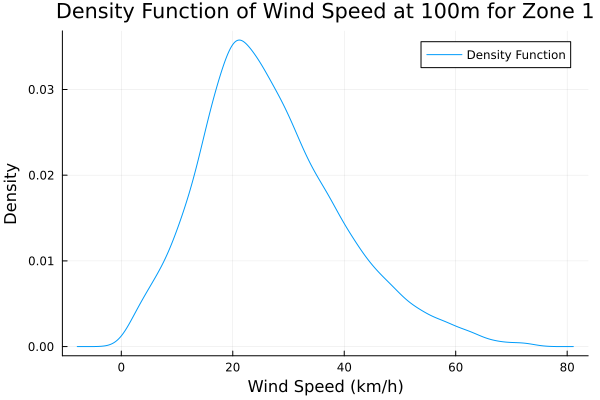

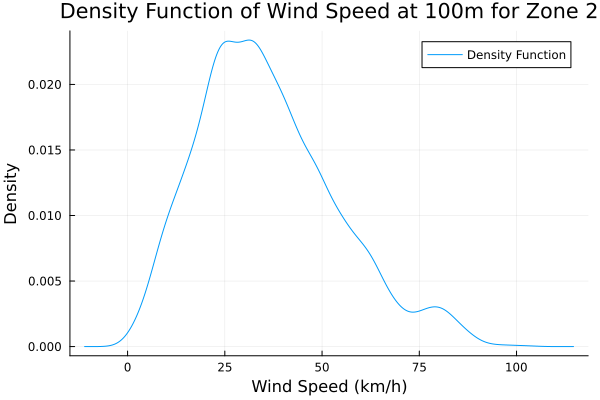

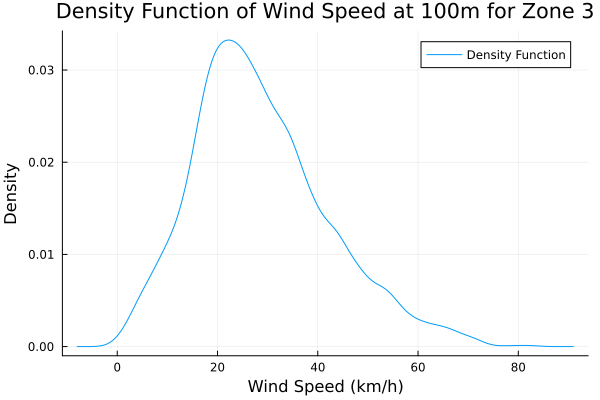

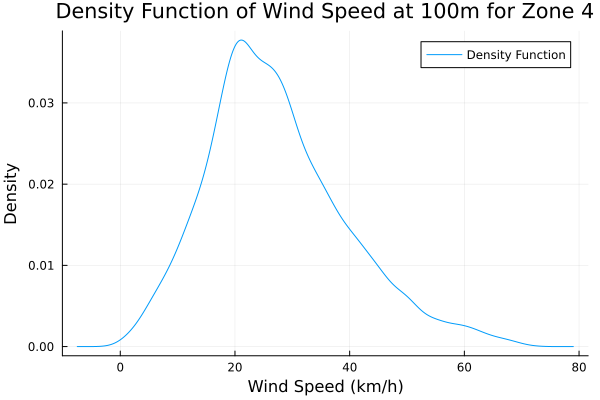

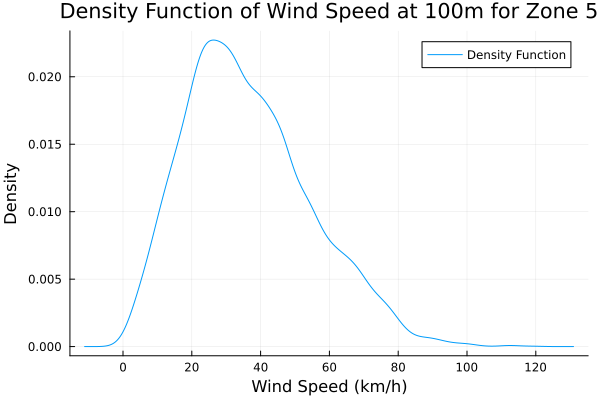

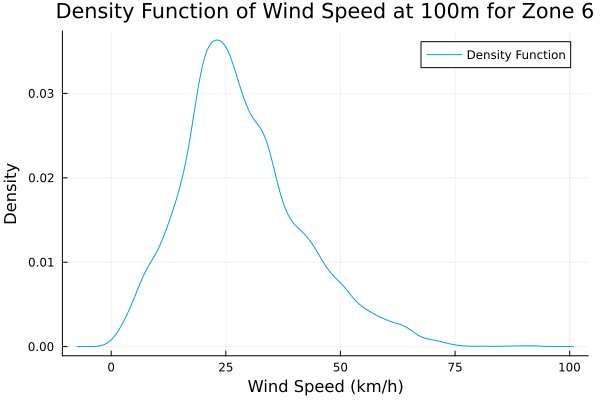

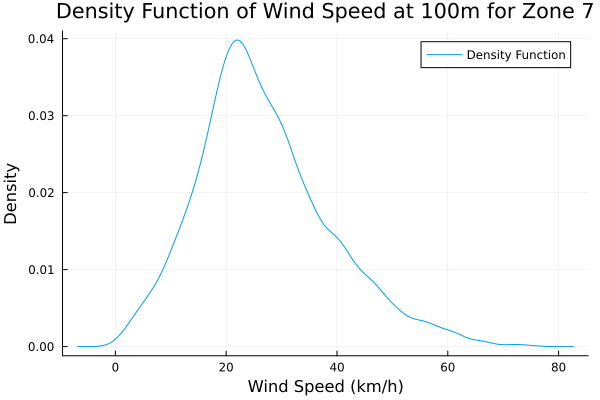

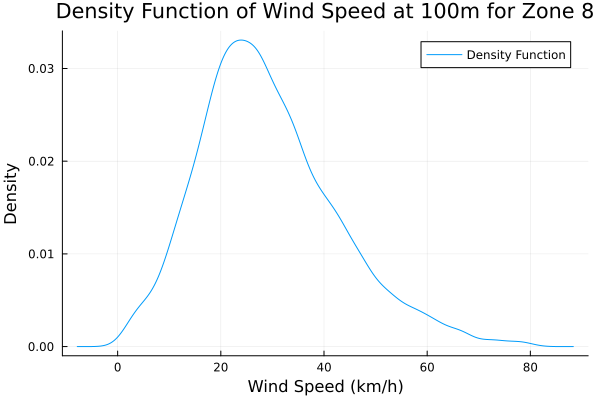

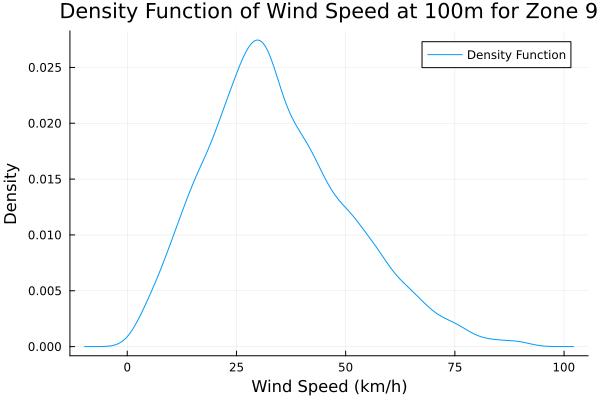

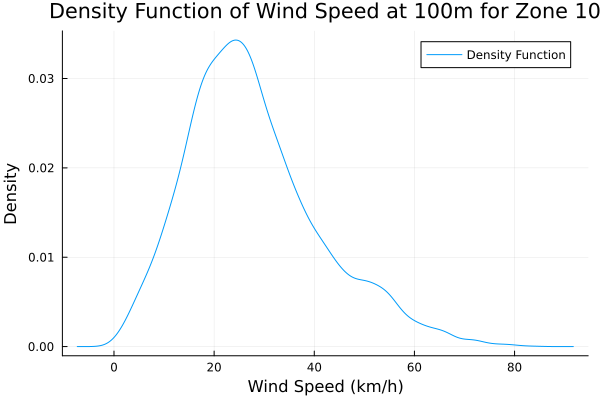

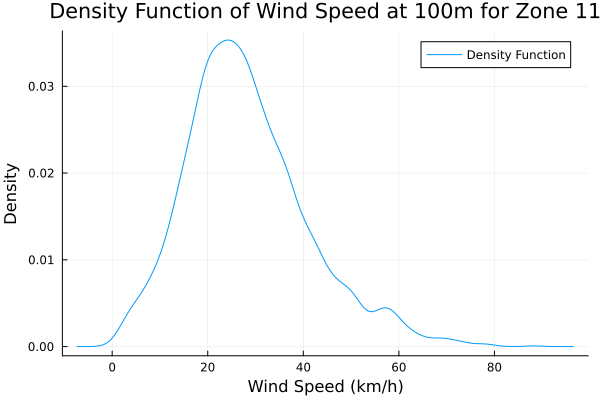

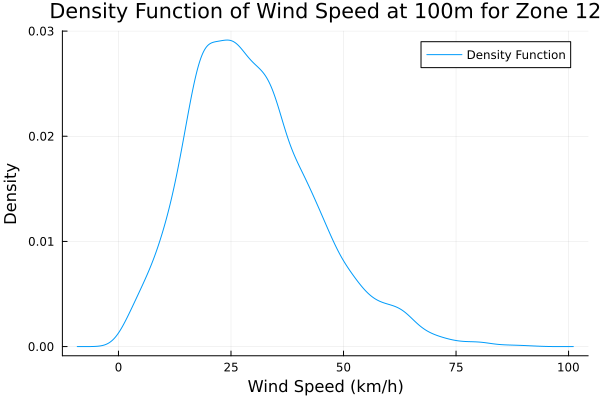

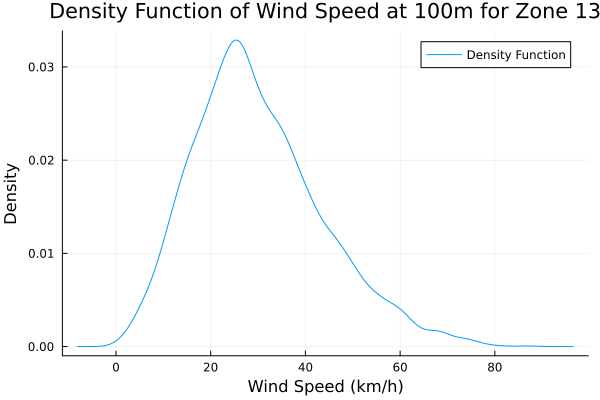

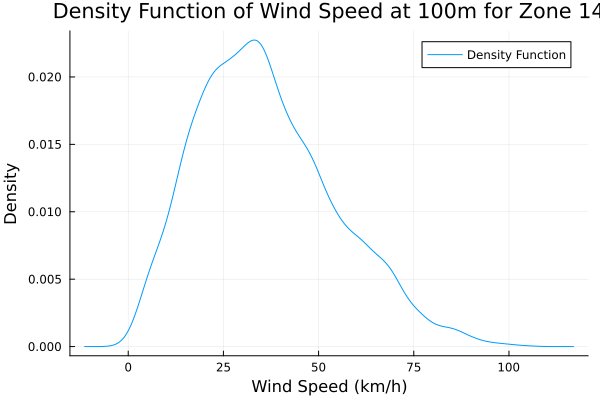

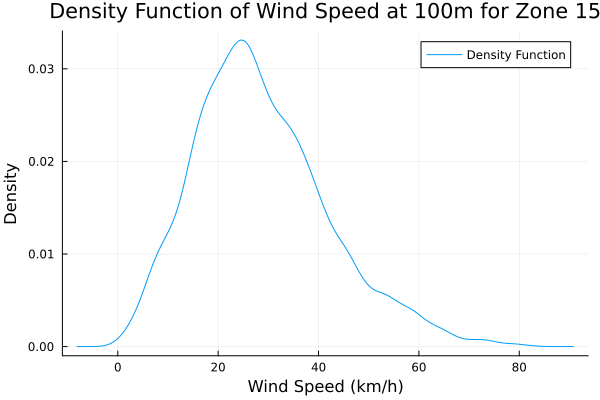

In [90]:
# Assuming `zones` is your dictionary containing the DataFrames
for zone in 1:15
    # Access the DataFrame from the dictionary
    df = zones["data_zone_$zone"]

    # Ensure wind_speed_100m is of type Float64 for proper NaN handling
    # Convert missing to NaN for uniform handling, if applicable
    df[!, :wind_speed_100m] = coalesce.(df[!, :wind_speed_100m], NaN)

    # Filter out both NaN and missing values from the wind_speed_100m column
    clean_wind_speed_100m = filter(!isnan, df[!, :wind_speed_100m])
    clean_wind_speed_100m = filter(x -> !ismissing(x), clean_wind_speed_100m)

    # Proceed only if clean_wind_speed_100m is not empty to avoid errors in kde
    if !isempty(clean_wind_speed_100m)
        # Calculate the density estimation
        density_estimation = kde(clean_wind_speed_100m)

        # Extract the points of evaluation and their density values
        xs = density_estimation.x
        densities = density_estimation.density

        # Plot the density function
        p = plot(xs, densities, title="Density Function of Wind Speed at 100m for Zone $zone", xlabel="Wind Speed (km/h)", ylabel="Density", label="Density Function")
        display(p) 
    else
        println("No valid data for wind speed at 100m in zone $zone")
    end
end


In [91]:
# Extract the wind speed columns for all zones
wind_speeds = [zones["data_zone_$i"][:, :wind_speed_100m] for i in 1:15]

# Align the data by date_time (if necessary)
# For this example, we're assuming they are already aligned
# Otherwise, you'd have to join these data frames on the date_time column

# Create a new DataFrame with wind speeds from each zone
df_wind_speeds = DataFrame(wind_speeds, :auto)

# Calculate the correlation matrix
correlation_matrix = cor(Matrix(df_wind_speeds))

# Display the correlation matrix
df_correlation = DataFrame(correlation_matrix, :auto)

15×15 DataFrame
 Row │ x1        x2        x3        x4        x5        x6        x7        x ⋯
     │ Float64   Float64   Float64   Float64   Float64   Float64   Float64   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.0       0.906218  0.883127  0.905695  0.759482  0.778205  0.809256  0 ⋯
   2 │ 0.906218  1.0       0.931856  0.916481  0.846507  0.845201  0.85636   0
   3 │ 0.883127  0.931856  1.0       0.959143  0.89652   0.920723  0.929473  0
   4 │ 0.905695  0.916481  0.959143  1.0       0.858854  0.886955  0.924137  0
   5 │ 0.759482  0.846507  0.89652   0.858854  1.0       0.945051  0.911406  0 ⋯
   6 │ 0.778205  0.845201  0.920723  0.886955  0.945051  1.0       0.954616  0
   7 │ 0.809256  0.85636   0.929473  0.924137  0.911406  0.954616  1.0       0
   8 │ 0.811659  0.840777  0.905603  0.922586  0.868867  0.90585   0.95778   1
   9 │ 0.768107  0.79606   0.858728  0.877818  0.853993  0.876697  0.919608  0 ⋯
  10 │ 0.687678  0.749316  0.82358   0.792051  0.90852   0.90862   0.876175  0
  11 │ 0.729277  0.787173  0.867502  0.846927  0.918987  0.94721   0.929742  0
  12 │ 0.691784  0.742482  0.820732  0.817637  0.872731  0.888322  0.896793  0
  13 │ 0.684245  0.723577  0.796412  0.802445  0.836709  0.850327  0.875011  0 ⋯
  14 │ 0.656424  0.725718  0.794098  0.758579  0.902805  0.874624  0.843226  0
  15 │ 0.651026  0.698559  0.777379  0.763072  0.840404  0.84927   0.846595  0
                                                               8 columns omitted

In [17]:
"""
# Assuming df_zone_11 is your DataFrame and it has a column :wind_speed_100m
# Filter out rows where :wind_speed_100m is NaN
clean_wind_speed_100m = df_zone_11[.!isnan.(df_zone_11[!, :wind_speed_100m]), :]

# Check if there are at least 100 values
if size(clean_wind_speed_100m, 1) >= 100
    # Take the first 100 values of the wind_speed_100m column
    wind_speed_100m_subset = clean_wind_speed_100m[1:500, :wind_speed_100m]

    # Create a plot
    plot(wind_speed_100m_subset, title = "Wind Speed at 100m", xlabel = "Hours", ylabel = "Speed (m/s)", legend = false)
else
    println("Not enough data to plot 100 values.")
end
"""

LoadError: UndefVarError: `df_zone_11` not defined

## Generate 1D scenarios (no 24 hours)

In [18]:
# Set a seed for reproducibility
Random.seed!(123)

clean_wind_speed_100m = filter(!isnan, df_zone_11[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Generate 1000 scenarios based on the fitted Weibull distribution
scenarios = rand(params, 1000)

# Now 'scenarios' contains 1000 wind speed values sampled from the fitted Weibull distribution


LoadError: UndefVarError: `df_zone_11` not defined

In [19]:
# Create an array for the scenario indices
scenario_indices = 1:length(scenarios)

# Generate the scatter plot
scatter(scenario_indices, scenarios, 
        title = "Wind Speed Scenarios at 100m", 
        xlabel = "Scenario Index", 
        ylabel = "Wind Speed (km/h)", 
        legend = false,
        color = "blue",
        markersize = 3)

# Display the plot
display(current())


LoadError: UndefVarError: `scenarios` not defined

In [20]:
# Reshape the scenarios to a 2D array with one feature per row
# Since you have only one feature (wind speed), it becomes a single-row matrix
data_matrix = reshape(scenarios, 1, :)

# Determine the number of clusters you want to find, for example, k = 3
k = 5

# Run the KMeans algorithm
result = kmeans(data_matrix, k; maxiter=200, init=:kmpp)

# The output 'result' contains several fields, including:
#   - result.assignments: the cluster index for each scenario
#   - result.centers: the center of each cluster
#   - result.counts: the number of scenarios in each cluster

# You can also assign the scenarios to their clusters
clusters = assignments(result)

# If you want to visualize the clusters, you can plot them
using Plots

# Since we only have one feature, we'll use the scenario index as the x-axis and the scenario value as the y-axis
# Color the points based on the cluster assignment
scatter(1:length(scenarios), scenarios, zcolor=clusters, palette=:Set1,
        title="KMeans Clustering of Wind Speed Scenarios",
        xlabel="Scenario Index", ylabel="Wind Speed (km/h)",
        legend=false)


LoadError: UndefVarError: `scenarios` not defined

## Generate 24 hour scenarios

In [21]:
# Set a seed for reproducibility
Random.seed!(123)
clean_wind_speed_100m = filter(!isnan, df_zone_11[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 1000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Generate 1000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    scenario_matrix[i, :] = rand(params, 24)
end

scenario_matrix
# 'scenario_matrix' is now a 1000x24 matrix where each row represents a scenario


LoadError: UndefVarError: `df_zone_11` not defined

In [22]:
# Only execute this code for <10 scenarios
"""
# Let's assume 'scenario_matrix' is your 100x24 matrix with the scenarios.
num_scenarios, num_hours = size(scenario_matrix)

# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.
# Here, we plot all scenarios with some transparency.
plot(legend = false, xlabel = "Hour", ylabel = "Wind Speed (km/h)", title = "Wind Speed Scenarios Over Time")

for i in 1:num_scenarios
    plot!(1:num_hours, scenario_matrix[i, :], label = "", alpha = 0.5)  # Using alpha for transparency
end

# Display the plot
display(current())
"""

"# Let's assume 'scenario_matrix' is your 100x24 matrix with the scenarios.\nnum_scenarios, num_hours = size(scenario_matrix)\n\n# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.\n# Here, we plot all scenarios with some transpa" ⋯ 18 bytes ⋯ " = false, xlabel = \"Hour\", ylabel = \"Wind Speed (km/h)\", title = \"Wind Speed Scenarios Over Time\")\n\nfor i in 1:num_scenarios\n    plot!(1:num_hours, scenario_matrix[i, :], label = \"\", alpha = 0.5)  # Using alpha for transparency\nend\n\n# Display the plot\ndisplay(current())\n"

In [23]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 5

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())



LoadError: UndefVarError: `scenario_matrix` not defined

## Considering Time Series Data

Using basic normal distribution "time series" data.

In [24]:
# Set a seed for reproducibility
Random.seed!(123)

clean_wind_speed_100m = filter(!isnan, df_zone_11[!, :wind_speed_100m])

# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 1000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Define a small standard deviation for the normal distribution increments
std_dev_increment = 10.0  # Adjust this value as needed for your application

# Generate 1000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    # Start the first hour with a random value from the Weibull distribution
    scenario_matrix[i, 1] = rand(params)
    for j in 2:24
        # Generate a small random increment
        increment = rand(Normal(0, std_dev_increment))
        
        # The next value is the previous value plus the increment
        # Use the max function to ensure that the value doesn't go below a certain threshold (e.g., 0)
        scenario_matrix[i, j] = max(scenario_matrix[i, j-1] + increment, 0)
    end
end

scenario_matrix
# 'scenario_matrix' is now a 1000x24 matrix where each row represents a scenario


LoadError: UndefVarError: `df_zone_11` not defined

In [25]:
# Only execute for <10 scenarios
"""
num_scenarios, num_hours = size(scenario_matrix)

# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.
# Here, we plot all scenarios with some transparency.
plot(legend = false, xlabel = "Hour", ylabel = "Wind Speed (km/h)", title = "Wind Speed Scenarios Over Time")

for i in 1:num_scenarios
  # plot!(1:num_hours, scenario_matrix[i, :], label = "", alpha = 0.5)  # Using alpha for transparency
end

# Display the plot
display(current())
"""

"num_scenarios, num_hours = size(scenario_matrix)\n\n# Plotting all scenarios can be cluttered, so you might want to plot a subset or use transparency.\n# Here, we plot all scenarios with some transparency.\nplot(legend = false, xlabel = \"Hour\", ylabel = \"Wind Speed (km/h)\", title = \"Wind Speed Scenarios Over Time\")\n\nfor i in 1:num_scenarios\n  # plot!(1:num_hours, scenario_matrix[i, :], label = \"\", alpha = 0.5)  # Using alpha for transparency\nend\n\n# Display the plot\ndisplay(current())\n"

In [26]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 10

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())



LoadError: UndefVarError: `scenario_matrix` not defined

## "Nudging"

In [27]:
# Set a seed for reproducibility
Random.seed!(123)

# Assuming 'clean_wind_speed_100m' has been properly defined and filtered
# Fit a Weibull distribution to the cleaned data
params = fit_mle(Weibull, clean_wind_speed_100m)

# Initialize a matrix with 10000 rows and 24 columns
scenario_matrix = Matrix{Float64}(undef, 10000, 24)

# Define a small standard deviation for the normal distribution increments
std_dev_increment = 2.0  # Adjust this value as needed for your application

# Define a nudge factor to control how much we "nudge" towards the previous value
nudge_factor = 0.05  # Adjust this between 0 and 1 as needed

# Generate 10000 scenarios, each with 24 values, and fill the matrix
for i in 1:10000
    # Start the first hour with a random value from the Weibull distribution
    scenario_matrix[i, 1] = rand(params)
    for j in 2:24
        # Generate a random value from the Weibull distribution
        weibull_value = rand(params)
        
        # Calculate the difference between the new Weibull value and the previous value
        difference = weibull_value - scenario_matrix[i, j-1]
        
        # Nudge the Weibull value towards the previous value using the normal distribution
        # Adjust the nudge factor as needed
        nudge = rand(Normal(0, std_dev_increment)) * nudge_factor
        
        # The next value is the Weibull value plus a proportion of the nudge
        scenario_matrix[i, j] = max(weibull_value + nudge * difference, 0)
    end
end

scenario_matrix


LoadError: UndefVarError: `clean_wind_speed_100m` not defined

In [28]:
# Transpose the scenario_matrix to fit the KMeans requirements
# Each column represents a data point for KMeans
data_for_kmeans = transpose(scenario_matrix)

# Determine the number of clusters, k = 2
k = 10

# Run the KMeans algorithm
result = kmeans(data_for_kmeans, k; maxiter=200, init=:kmpp)
# Assuming 'scenario_matrix' is your 1000x24 matrix with the scenarios
# and 'result' is the output from kmeans

# Extract the cluster centroids by transposing
centroids = result.centers'

# The centroids matrix has 'k' rows and 'num_hours' columns
num_hours = size(centroids, 2)

# Initialize the plot with the correct number of ticks on the x-axis
plot(xticks=1:num_hours, legend=:bottomright, xlabel="Hour", ylabel="Wind Speed (km/h)", title="Cluster Centroids Over Time")

# Plot each centroid as a separate line
for i = 1:size(centroids, 1)
    plot!(1:num_hours, centroids[i, :], label="Cluster $i")
end

# Show the plot
display(current())



LoadError: UndefVarError: `scenario_matrix` not defined